In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
data_dict = dict(t='wine', color='red', lang='en', n=100, c='US')

In [13]:
winedata = requests.get('http://api.snooth.com/wines/?akey=8848wbktav0wzuq5i8n9auajr4tut1xhs68tqvixuh13ldfa', params=data_dict)



In [14]:
winedata

<Response [200]>

In [15]:
winedata.json()


{'meta': {'results': 776744, 'returned': 100, 'errmsg': '', 'status': 1},
 'wines': [{'name': 'Dominio Dostares Prieto Picudo Vino de la Tierra de Castilla Y León Cumal',
   'code': 'dominio-dostares-prieto-picudo-vino-de-la-tierra-de-castilla-y-leon-cumal-2006',
   'region': 'Spain > Castilla y León > Vino de la Tierra de Castilla y León',
   'winery': 'Bischöfliches Priesterseminar Trier',
   'winery_id': 'bischofliches-priesterseminar-trier',
   'varietal': 'Prieto Picudo',
   'price': '0.00',
   'vintage': '2006',
   'type': 'Red Wine',
   'link': 'http://www.snooth.com/wine/dominio-dostares-prieto-picudo-vino-de-la-tierra-de-castilla-y-leon-cumal-2006/',
   'tags': '',
   'image': 'http://ei.isnooth.com/multimedia/d/0/4/image_336595_square.jpeg',
   'snoothrank': 'n/a',
   'available': 0,
   'num_merchants': 0,
   'num_reviews': 1},
  {'name': 'Dominio Dostares Prieto Picudo Vino de la Tierra de Castilla Y León Cumal',
   'code': 'dominio-dostares-prieto-picudo-vino-de-la-tierra-d

In [16]:
import pandas as pd
import numpy as np


In [17]:
wine = winedata.json()['wines']

In [18]:
winedf = pd.DataFrame.from_dict(wine)

In [19]:
winedf.head()

,available,code,image,link,msrp,name,num_merchants,num_reviews,price,region,snoothrank,tags,type,varietal,vintage,winery,winery_id
0,0,dominio-dostares-prieto-picudo-vino-de-la-tier...,http://ei.isnooth.com/multimedia/d/0/4/image_3...,http://www.snooth.com/wine/dominio-dostares-pr...,NaN,Dominio Dostares Prieto Picudo Vino de la Tier...,0,1,0.00,Spain > Castilla y León > Vino de la Tierra de...,n/a,,Red Wine,Prieto Picudo,2006,Bischöfliches Priesterseminar Trier,bischofliches-priesterseminar-trier
1,0,dominio-dostares-prieto-picudo-vino-de-la-tier...,http://ei.isnooth.com/multimedia/1/d/a/image_3...,http://www.snooth.com/wine/dominio-dostares-pr...,NaN,Dominio Dostares Prieto Picudo Vino de la Tier...,0,1,0.00,Spain > Castilla y León > Vino de la Tierra de...,n/a,,Red Wine,Prieto Picudo,2005,Bischöfliches Priesterseminar Trier,bischofliches-priesterseminar-trier
2,0,manzoni-estate-reserve-pinot-noir-2007,http://ei.isnooth.com/multimedia/4/a/1/image_8...,http://www.snooth.com/wine/manzoni-estate-rese...,48.00,"Manzoni Estate ""Reserve"" Pinot Noir",0,1,48.00,USA > California > Monterey County > Santa Luc...,n/a,,Red Wine,Pinot Noir,2007,Manzoni Estate Vineyard,manzoni-estate-vineyard
3,0,rocca-delle-rubizzo-2008,http://ei.isnooth.com/multimedia/b/f/1/image_9...,http://www.snooth.com/wine/rocca-delle-rubizzo...,NaN,Rocca Delle Rubizzo,0,11,0.00,Italy > Tuscany > Toscano,3,,Red Wine,Sangiovese,2008,Rubizzo,rubizzo
4,0,pascual-toso-malbec-blend-finca-pedregal-singl...,http://ei.isnooth.com/multimedia/c/f/9/image_9...,http://www.snooth.com/wine/pascual-toso-malbec...,NaN,Pascual Toso Malbec Blend Finca Pedregal Singl...,0,5,0.00,Argentina > Mendoza > Maipú,n/a,,Red Wine,Malbec; Cabernet Sauvignon,2005,Pascual Toso,pascual-toso


In [21]:
winedf.columns

Index(['available', 'code', 'image', 'link', 'msrp', 'name', 'num_merchants',
       'num_reviews', 'price', 'region', 'snoothrank', 'tags', 'type',
       'varietal', 'vintage', 'winery', 'winery_id'],
      dtype='object')

In [22]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
available        100 non-null int64
code             100 non-null object
image            100 non-null object
link             100 non-null object
msrp             23 non-null object
name             100 non-null object
num_merchants    100 non-null int64
num_reviews      100 non-null int64
price            100 non-null object
region           100 non-null object
snoothrank       100 non-null object
tags             100 non-null object
type             100 non-null object
varietal         100 non-null object
vintage          100 non-null object
winery           98 non-null object
winery_id        100 non-null object
dtypes: int64(3), object(14)
memory usage: 13.4+ KB


In [27]:
winedf.tags.unique()


array([''], dtype=object)

In [28]:
import matplotlib.pyplot as plt


In [29]:
price = winedf['price']

In [38]:
plot = plt.figure(figsize=(25,25))

<Figure size 1800x1800 with 0 Axes>

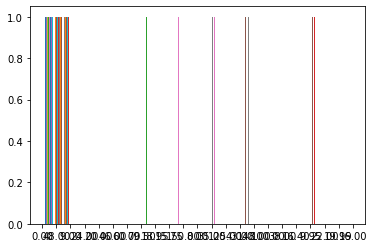

In [39]:
priceplot = plt.hist(price)

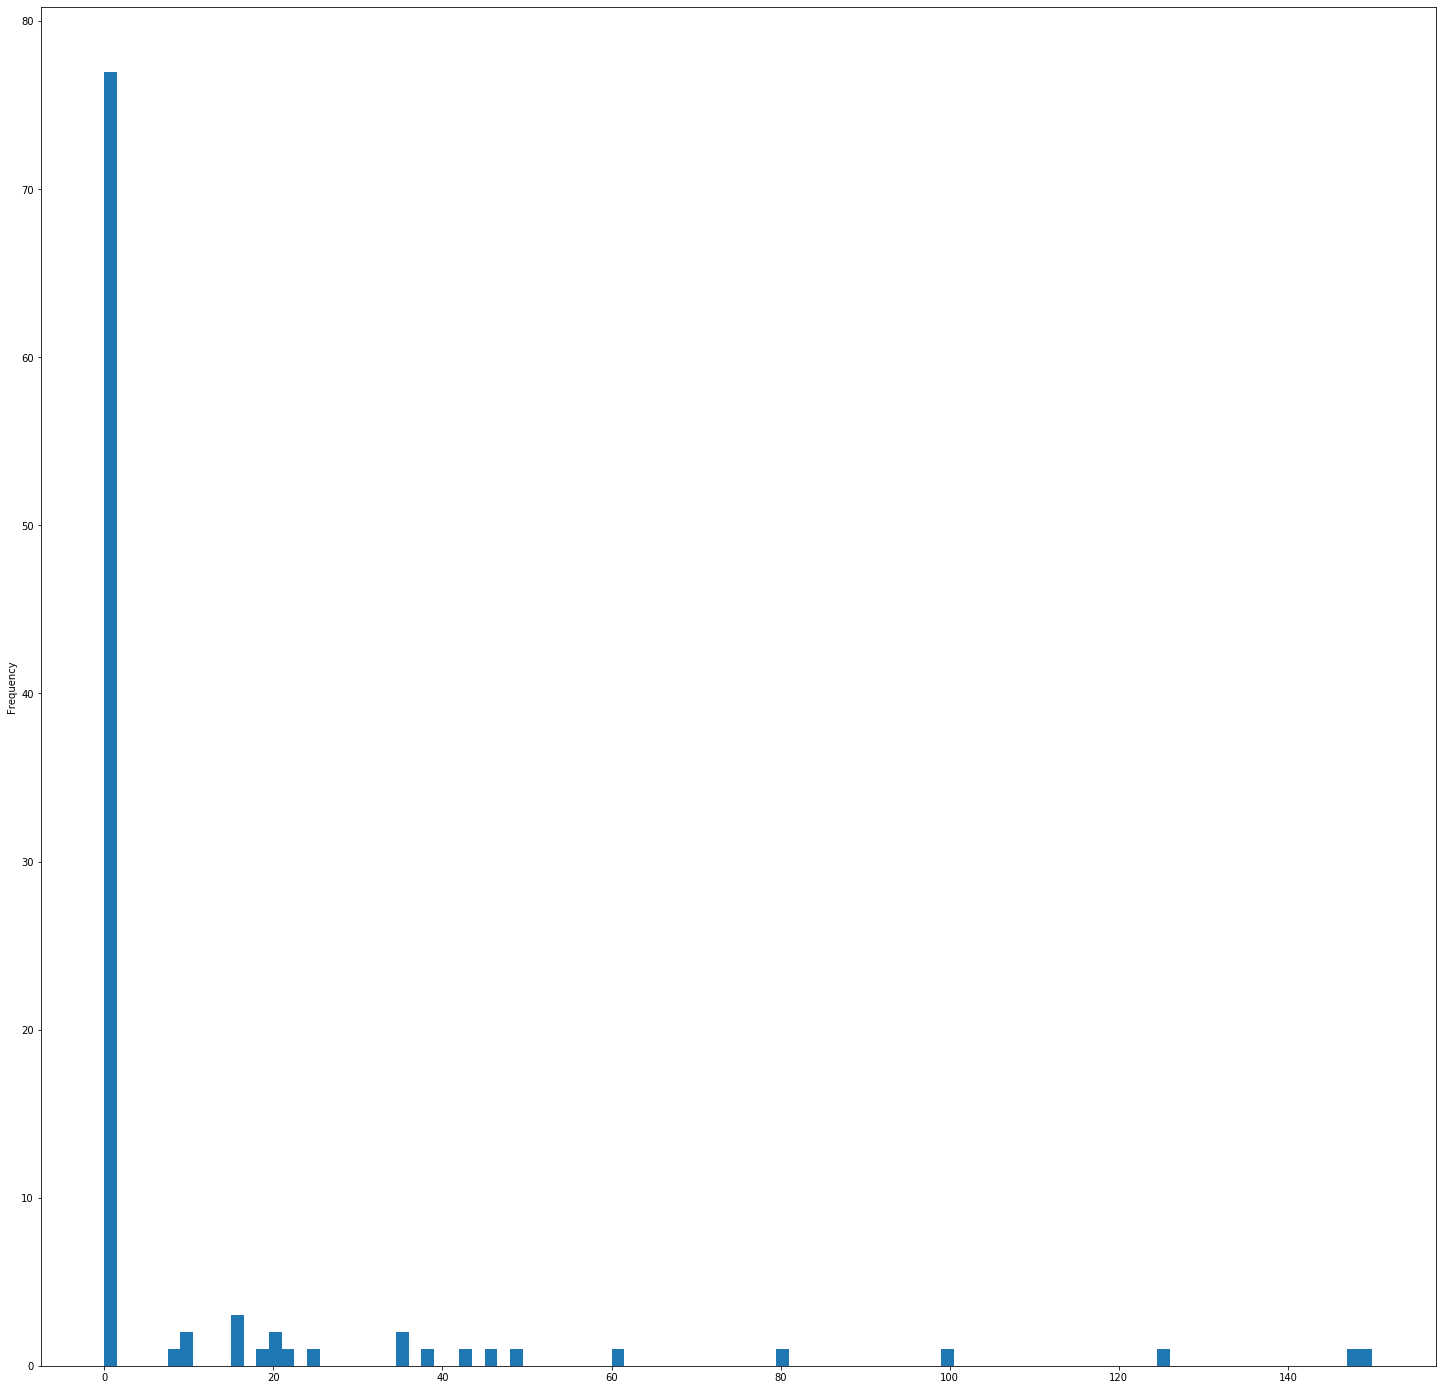

In [44]:
prices = winedf['price'].astype(float).plot.hist(bins=100, figsize=(25,25))

In [51]:
data_dict = dict(t='wine', color='red', lang='en', n=100, c='US', a=0, f=1, mp=1)
morewine = []
def getwine(x, datadict):
    for i in range(x):
        datadict['f']=i*100+1
        winedata = requests.get('http://api.snooth.com/wines/?akey=8848wbktav0wzuq5i8n9auajr4tut1xhs68tqvixuh13ldfa', params=data_dict)
        morewine.extend(winedata.json()['wines'])
        
    


In [52]:
getwine(10, data_dict)

In [53]:
morewinedf = pd.DataFrame.from_dict(morewine)

In [54]:
morewinedf.head()

,available,code,image,link,msrp,name,num_merchants,num_reviews,price,region,snoothrank,tags,type,varietal,vintage,winery,winery_id
0,1,hitching-post-generation-2005,http://ei.isnooth.com/multimedia/a/e/1/image_3...,http://www.snooth.com/wine/hitching-post-gener...,NaN,Hitching Post Generation,112,1,15.99,USA > California > Santa Barbara,n/a,,Red Wine,Cabernet Franc; Merlot; Syrah,2005,Hitching Post,hitching-post
1,1,villa-farnia-di-farnese-montepulciano-dabruzzo...,http://ei.isnooth.com/multimedia/d/5/c/image_7...,http://www.snooth.com/wine/villa-farnia-di-far...,NaN,Villa Farnia di Farnese Montepulciano d'Abruzzo,2,5,20.75,Italy > Abruzzi > Montepulciano d'Abruzzo,2.5,,Red Wine,Montepulciano,2008,Farnese Vini,farnese-vini
2,1,sette-ponti-2007,http://ei.isnooth.com/multimedia/5/9/a/image_9...,http://www.snooth.com/wine/sette-ponti-2007/,NaN,Sette Ponti,2,6,104.99,Italy > Tuscany > Maremma > Maremma Toscana Igt,3.5,,,,2007,Tenuta Sette Ponti,tenuta-sette-ponti
3,1,paracombe-shiraz-adelaide-hills-2001,http://ei.isnooth.com/multimedia/8/2/e/image_2...,http://www.snooth.com/wine/paracombe-shiraz-ad...,NaN,Paracombe Shiraz Adelaide Hills,1,12,69.99,Australia > Adelaide Hills,4,,Red Wine,Syrah,2001,Paracombe,paracombe
4,1,vina-misiones-de-rengo-carmenere-rapel-valley-...,http://ei.isnooth.com/multimedia/7/d/8/image_1...,http://www.snooth.com/wine/vina-misiones-de-re...,NaN,Viña Misiones de Rengo Carménère Rapel Valley ...,1,2,6.99,Chile > Central Valley > Rapel Valley > Rengo,3.5,,Red Wine,Carmenère,2008,Viña Misiones de Rengo,vina-misiones-de-rengo


In [56]:
morewinedf.shape


(1000, 17)

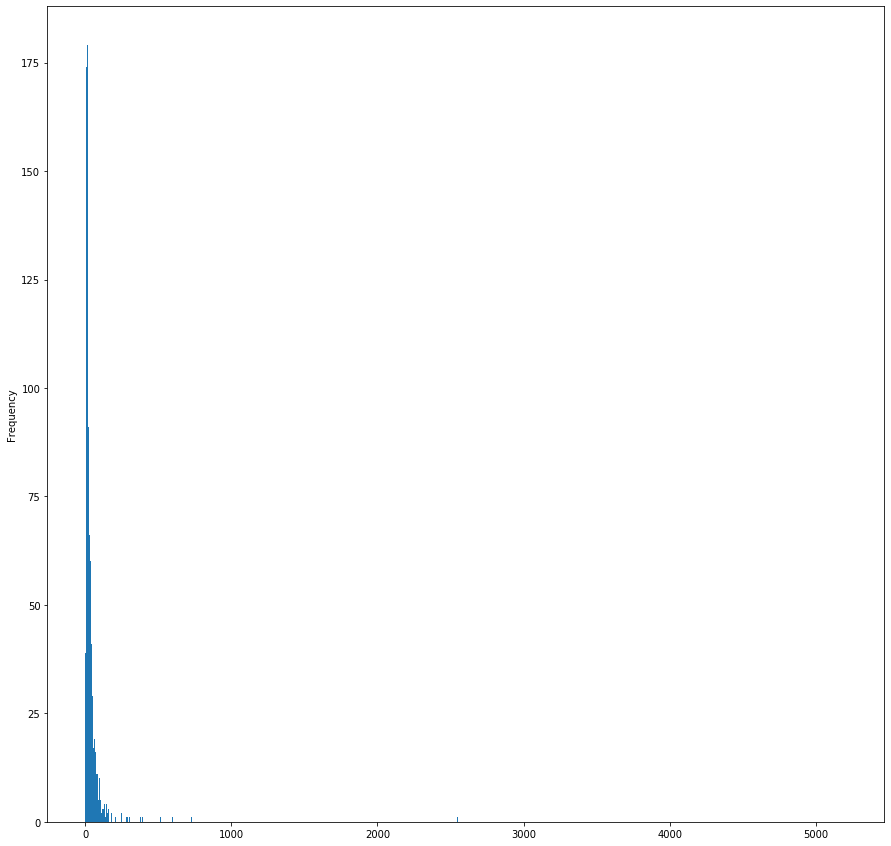

In [59]:
morewinedf_hist = morewinedf['price'].apply(lambda x: x.replace(',', '')).astype(float).plot.hist(bins=1000, figsize=(15,15))

In [62]:
import missingno


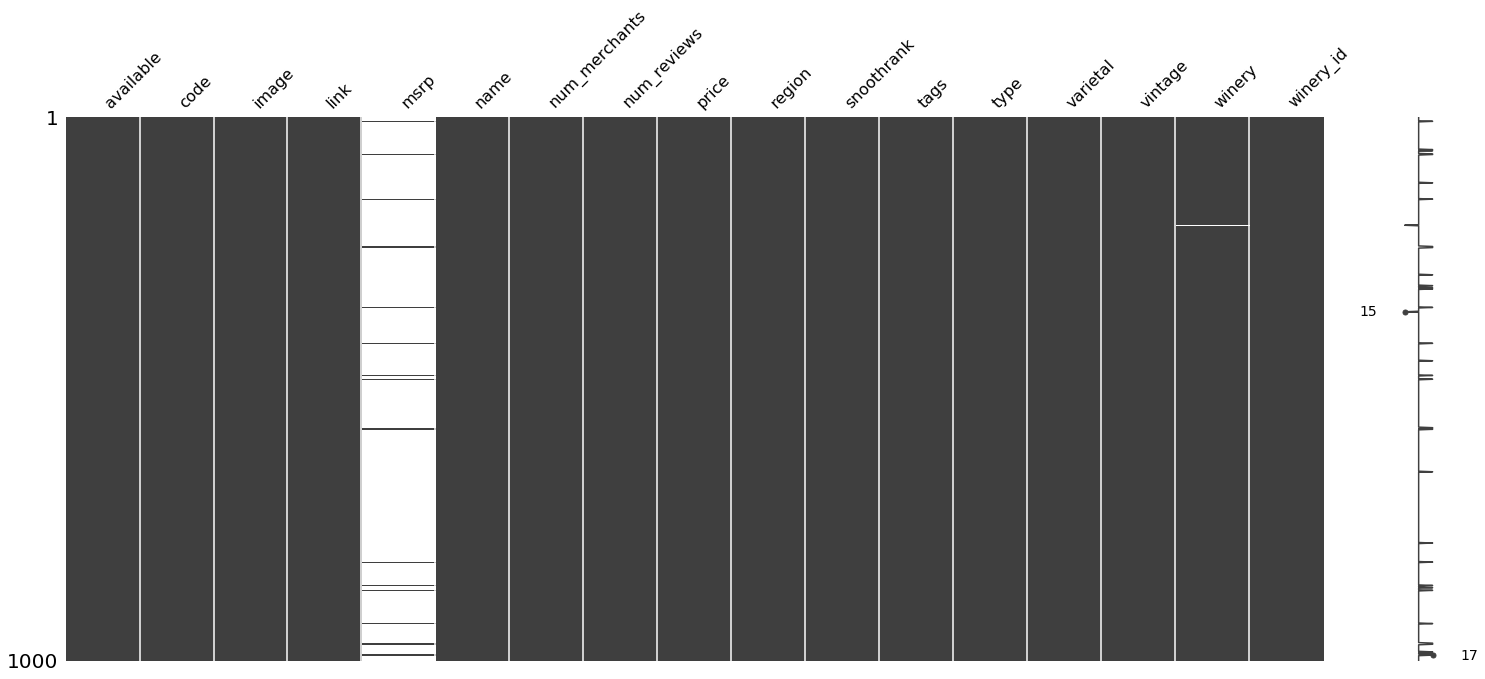

In [64]:
missingno.matrix(morewinedf)

In [1]:
morewinedf.shape

NameError: name 'morewinedf' is not defined